# Problem Statement :
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.
The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations

# Import libraries

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read csv file

In [3]:
df=pd.read_csv('playstore-analysis (2) (1).csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Tasks

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are missing values in Rating,Type,Content Rating,Current Ver,Android Ver

In [6]:
df.dropna(subset=['Rating'],inplace=True)

In [7]:
df.dropna(subset=['Type'],inplace=True)

In [8]:
df.dropna(subset=['Current Ver'],inplace=True)

In [9]:
df[df['Android Ver'].isna()]['App']

4453                      [substratum] Vacuum: P
4490                        Pi Dark [substratum]
10472    Life Made WI-Fi Touchscreen Photo Frame
Name: App, dtype: object

In [10]:
df.drop([10472],axis=0,inplace=True)
df[df['Android Ver'].isna()]['App']


4453    [substratum] Vacuum: P
4490      Pi Dark [substratum]
Name: App, dtype: object

In [11]:

df['Current Ver'].isna().sum()

0

In [12]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [13]:
df.shape




(9362, 13)

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Review,Installs,Type,Price and Android version are the features which need to be brought to numeric type

In [15]:
df.Reviews = df.Reviews.astype('int64')

In [16]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(int(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [17]:

newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [18]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5856
0.0    1321
2.0    1177
5.0     556
3.0     250
1.0     104
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [19]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1
df['Type'] = df['Type'].map(type_cat)
df.Type.fillna(method = 'ffill', inplace = True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9362 non-null   object 
 1   Category        9362 non-null   object 
 2   Rating          9362 non-null   float64
 3   Reviews         9362 non-null   int64  
 4   Size            9362 non-null   float64
 5   Installs        9362 non-null   int64  
 6   Type            9362 non-null   int64  
 7   Price           9362 non-null   float64
 8   Content Rating  9362 non-null   object 
 9   Genres          9362 non-null   object 
 10  Last Updated    9362 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9362 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1024.0+ KB


In [21]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Yes all the ratings are in between 1 to 5

In [22]:
df.Installs.unique()


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [23]:
df.Reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [24]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,0,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,1,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,0.0
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,1,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.0
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,0,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.0
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,0,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.0
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,0,0.00,Teen,Social,"July 23, 2018",1.0,4.0
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,1,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.0


So,there are some records in which Reviews are greater than Installs

In [25]:
df.drop([2454,4663,5917,6700,7402,8591,10697],inplace=True)
df[df['Reviews']>df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Handling Outliers

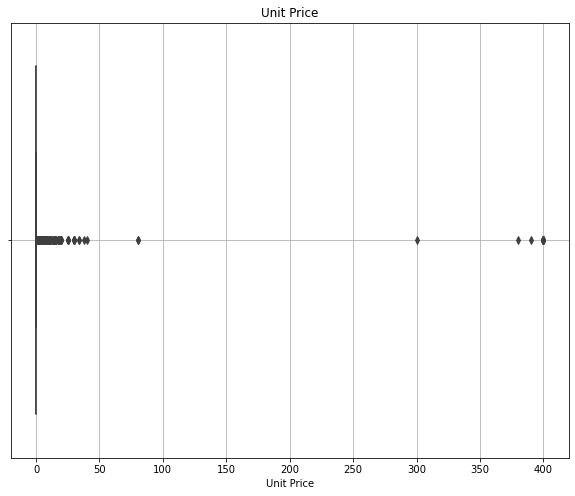

In [26]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [27]:
y=df[df['Price']==200]
print(y)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


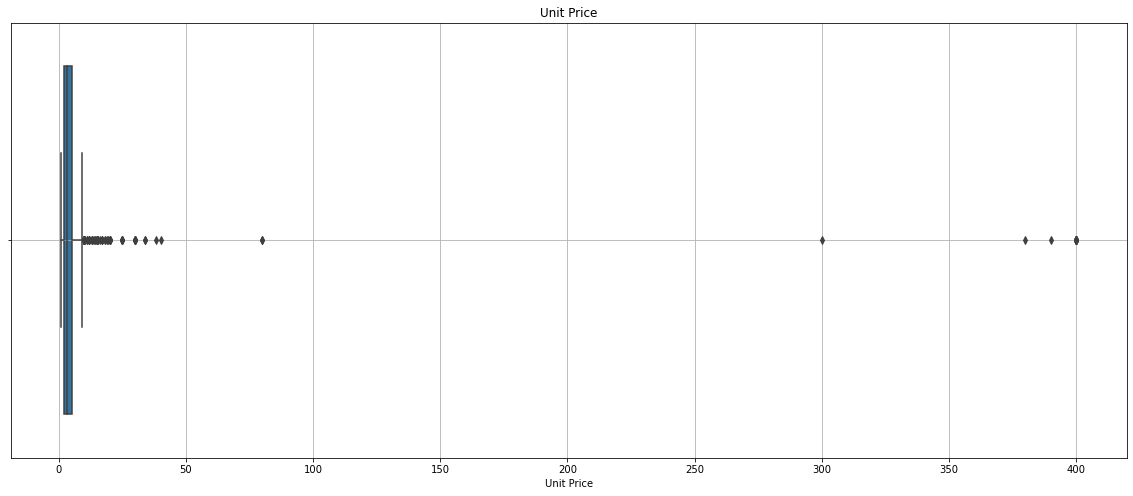

In [28]:
x= df[df['Price'] != 0]
plt.subplots(figsize=(20,8))
sns.boxplot(x.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [29]:
df= df[df['Price'] < 30]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.0


Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410221622
TOOLS                   273180158
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17547629
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12866394
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714317
MEDICAL                   1585000
AUTO_AND_VEHICLES         1163630
LIBRA

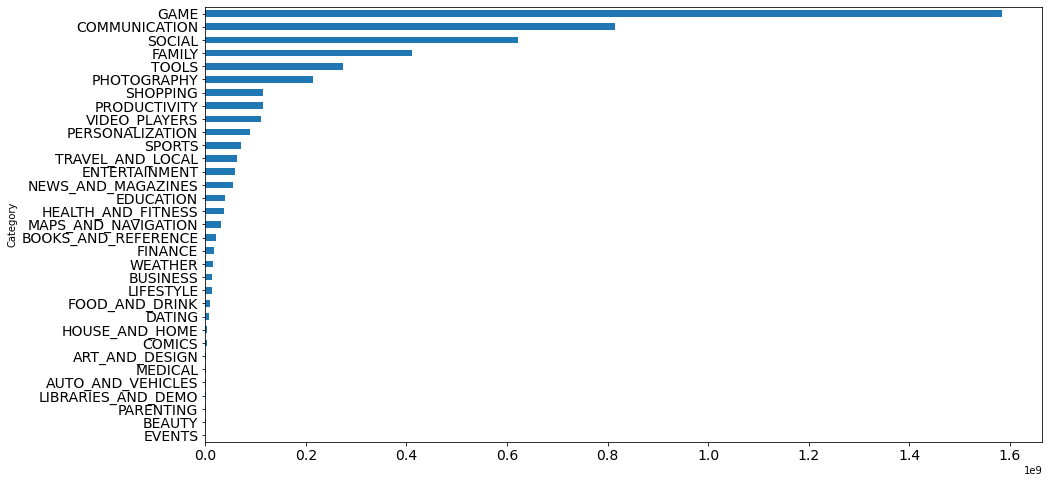

In [30]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

In [31]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0


In [32]:
val = df.Installs.quantile(0.95)
print(val)

100000000.0


In [33]:
x = df.Installs.quantile() > val
print (x)

False


# Data Analysis

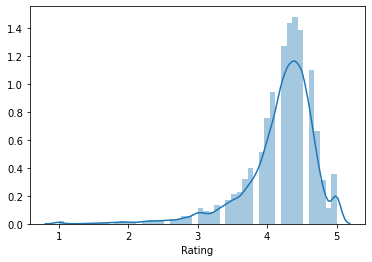

In [34]:
sns.distplot(df['Rating'])
plt.show()


Here we can observe that most of the rating is lying in between 4 to 5 which creats skewness in the rating and 
this skewness rating may harm the  desired prediction in the model.

In [35]:
df['Content Rating'].value_counts()

Everyone           7390
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes ,Adults only 18+ and Unrated are so less in Content Rating

In [36]:
df.drop(df[df['Content Rating']=='Adults only 18+'].index, inplace = True)
df.drop(df[df['Content Rating']=='Unrated'].index, inplace = True)
df['Content Rating'].value_counts()

Everyone        7390
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

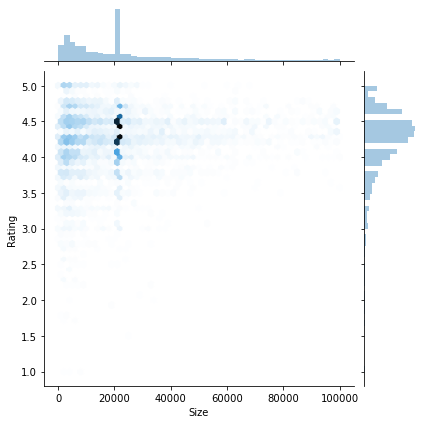

In [37]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb). Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

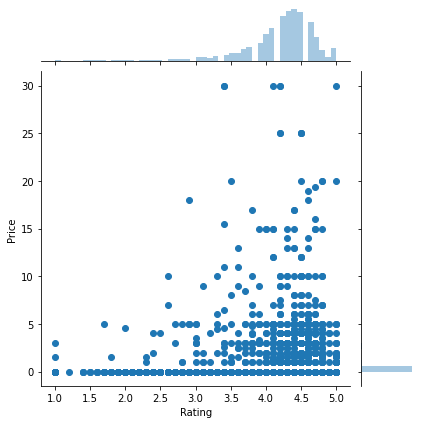

In [38]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df)
plt.show()

Price is directly proportional to Rating
means increasing the Price ,Rating increases

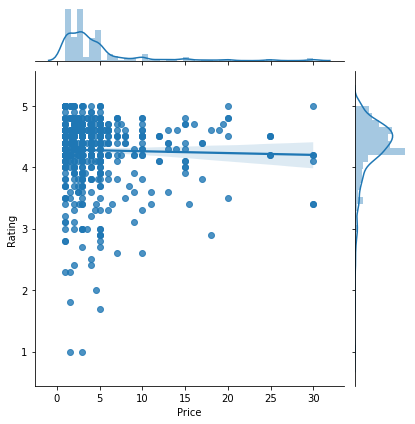

In [39]:
sns.jointplot(x ="Price" , y = "Rating" ,data = df[df['Price']>0], kind = "reg" )
plt.show()

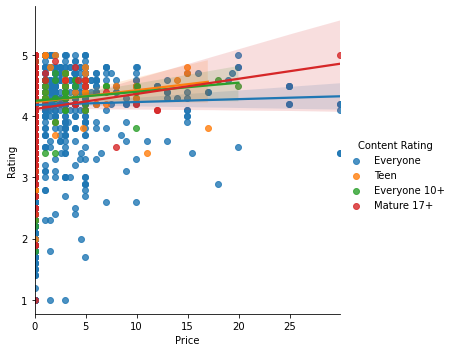

In [40]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df)
plt.show()

Mature and Teen are more positively co-related in Content rating than 10+ and everyone


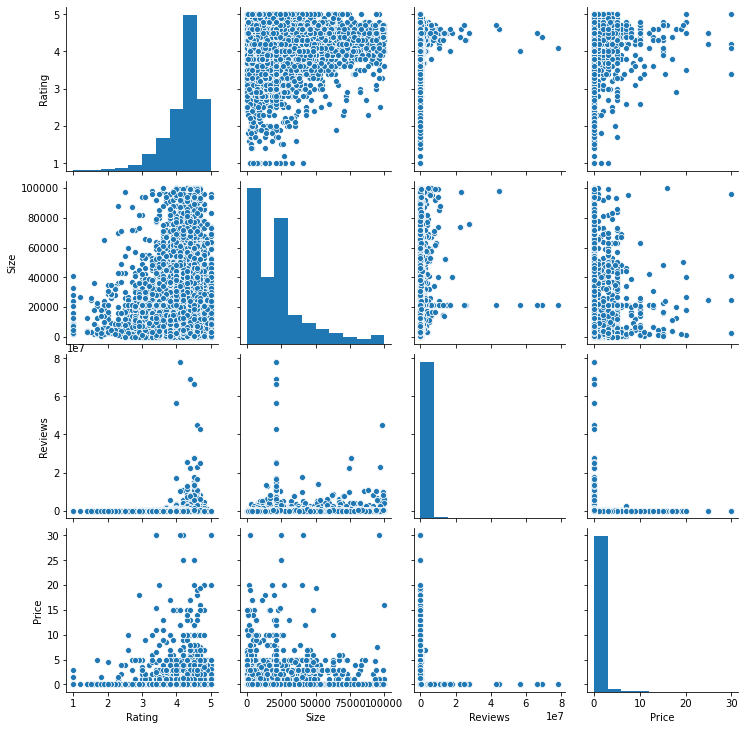

In [41]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

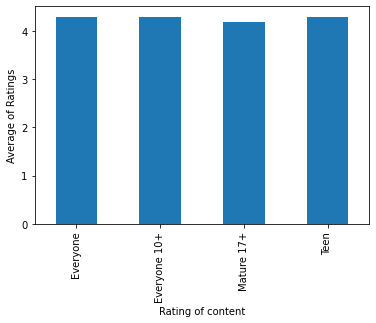

In [42]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

So, I will be using median for drawing plot for Rating and Content Rating so better visualization

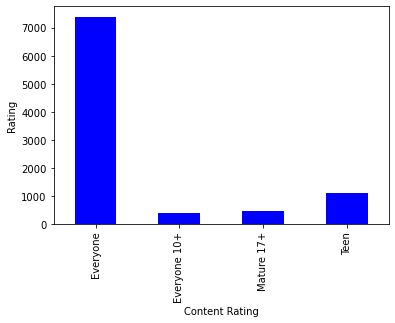

In [43]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

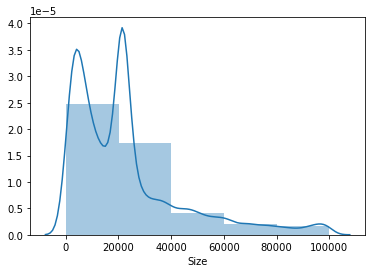

In [44]:
sns.distplot(df["Size"], bins=5)
plt.show()

In [45]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.117823,4.188889,3.951429,4.225773
LOW,4.162155,4.207143,4.129592,4.209655
MED,4.186207,4.300000,3.900000,4.131847
HIGH,4.244962,4.227273,4.208497,4.243333
VERY HIGH,4.209349,4.287805,4.197170,4.279603


In [46]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.000000
0.4    14000.000000
0.6    21516.529524
0.8    34000.000000
Name: Size, dtype: float64

In [47]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,3.9,4.16,3.50,3.90
HIGH,4.0,4.00,4.00,4.00
VERY HIGH,3.9,4.10,4.00,4.00


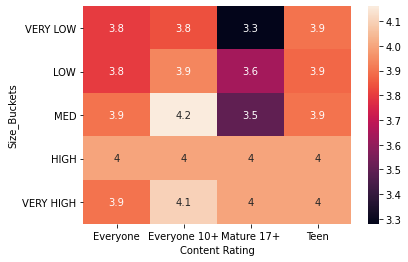

In [48]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

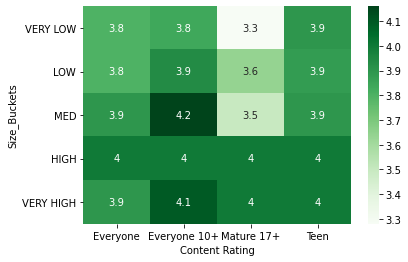

In [49]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it. Except, Mature 17+ where low size apps aren't preferred to a greater variation.

# Finished !!!!